# Data pre-processing

In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('results.txt')
df.columns = ['id', 'num', 'image', 'label', 'time']
df.drop(["num"], axis=1, inplace=True)

# Removal of outliers
print(len(df))
df.drop(df[df['time'] < 0.2].index, inplace=True)
df.drop(df[df['time'] > 3].index, inplace=True)
print(len(df))

# Normalization of reaction times for each person
df['mean'] = df.groupby('id')['time'].transform('mean')
df['min'] = df.groupby('id')['time'].transform('min')
df['max'] = df.groupby('id')['time'].transform('max')
df['normalized'] = (df['time']-df['min']) / (2*(df['max'] - df['min']))

df['SmileNorm'] = 1-df['normalized']
df['score'] = df['normalized']
df['score'][df['label'] == "Smiling"] = df['SmileNorm']

3962
3933


C:\Users\kathr\AppData\Local\Temp/ipykernel_6120/2759227173.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'][df['label'] == "Smiling"] = df['SmileNorm']


In [3]:
df.head()

,id,image,label,time,mean,min,max,normalized,SmileNorm,score
0,7,55_1_0_20170103183939755.jpg.chip.jpg,Smiling,0.7776,0.826893,0.4476,2.2428,0.091912,0.908088,0.908088
1,7,42_1_0_20170105173320357.jpg.chip.jpg,Smiling,0.5956,0.826893,0.4476,2.2428,0.041221,0.958779,0.958779
2,7,26_1_1_20170112205848764.jpg.chip.jpg,Smiling,0.6308,0.826893,0.4476,2.2428,0.051025,0.948975,0.948975
3,7,28_0_3_20170113153014880.jpg.chip.jpg,Not smiling,0.6131,0.826893,0.4476,2.2428,0.046095,0.953905,0.046095
4,7,50_0_0_20170113184603160.jpg.chip.jpg,Not smiling,0.7651,0.826893,0.4476,2.2428,0.088430,0.911570,0.088430


Text(0.5, 0, 'Index')

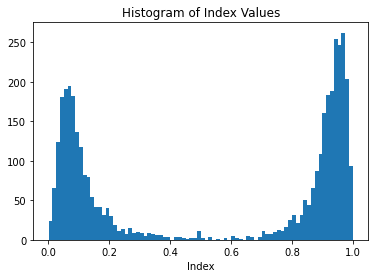

In [4]:
# Plotting histogram of index values
plt.title('Histogram of Index Values')
plt.hist(df['score'], bins = 80)
plt.xlabel('Index')

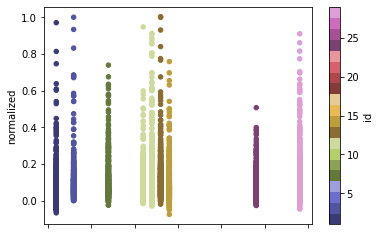

In [ ]:
df.plot.scatter(x='id', y='normalized', c="id", cmap="tab20b")


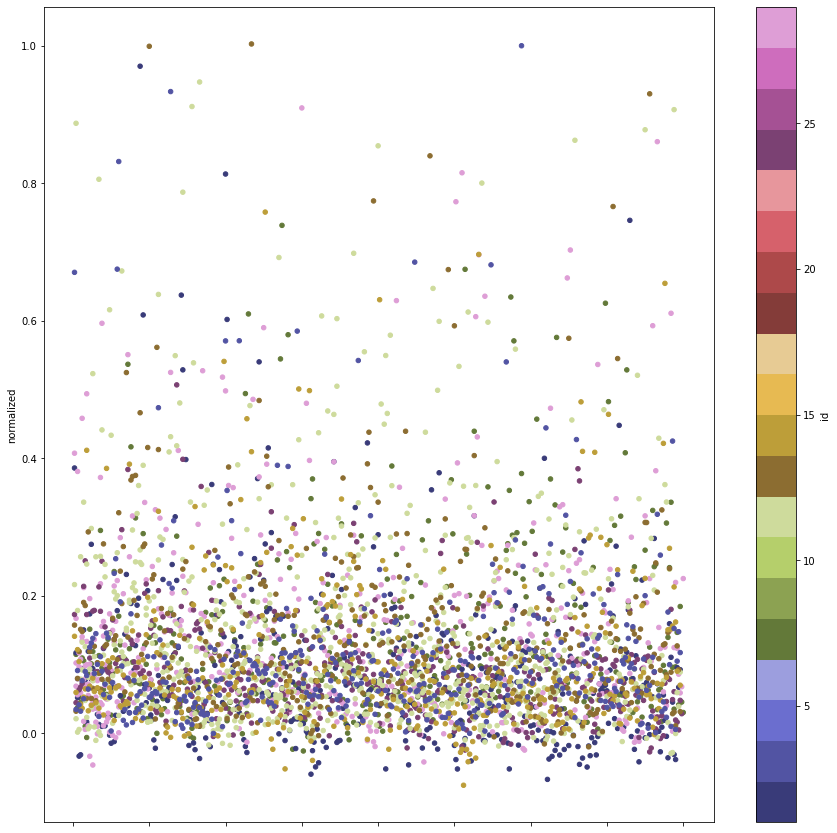

In [ ]:
df.plot.scatter(x='num', y='normalized', c="id", cmap="tab20b", figsize=(15, 15))

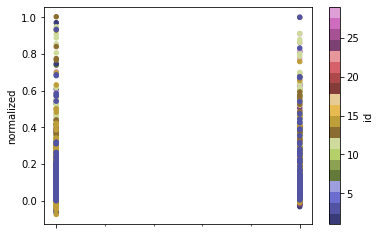

In [ ]:
df.plot.scatter(x='label', y='normalized', c="id", cmap="tab20b")

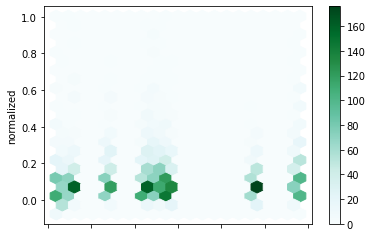

In [ ]:
df.plot.hexbin(x='id', y='normalized', gridsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


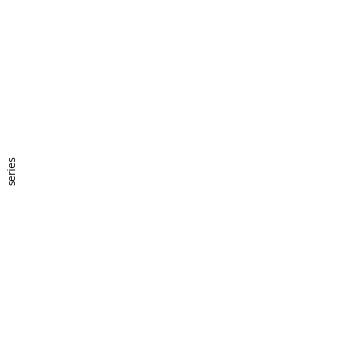

In [ ]:
series = pd.Series(index=['id','normalized'], name="series")
series.plot.pie(figsize=(6, 6));

# PCA

In [3]:
###############################
# PCA and feature subtraction #
###############################

# Loading the mean image
import numpy as np
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("SampledPhotos/*.jpg.chip.jpg")]

# Subtracting the mean image 
len(images)

im = np.array(images)

images[0].shape

(200, 200, 3)

In [15]:
big_im = np.zeros([120000,len(images)])
for i in range(len(images)):
    big_im[:,i] = images[i].reshape(120000)

In [21]:
means = np.mean(big_im, axis=1)

(120000,)

In [31]:
subtracted_mean = (big_im.T - means).T

# 6

In [18]:
big_im

array([[ 20.,  30., 255., ...,  90.,  21.,  63.],
       [ 27.,  41., 255., ...,  98.,  24.,  79.],
       [ 36.,  55., 251., ..., 111.,  29.,  92.],
       ...,
       [ 16.,  69.,   0., ...,  72., 226., 134.],
       [ 27.,  61.,   0., ...,  72., 227., 155.],
       [ 31., 114.,   0., ...,  84., 231., 193.]])

In [ ]:
]

# Linear Model

# 8

# 9

# 10